# Linear algebra toturial session (Dec 12 2023): Exam Practice Problems

- Prioritize reviewing the lecture slides from all units, with a special focus on the material covered after the midterm. Additionally, revisit and thoroughly understand the assignments and lab exercises associated with each topic, as they are essential for practical understanding.
- The goal of this session is to guide you through the approaches for solving problems and effective studying techniques for the exam. It's important to grasp the underlying concepts and problem-solving strategies rather than relying on rote memorization of specific solutions.

## Question 13: Unit 20
Solve for the motion of a (non-linear) pendulum using Euler's method.

### Answer
Equations of motion can be split into

$$d\theta/dt = \omega$$
$$d\omega/dt = -g\sin(\theta)/L$$

Taking the 2-component state vector $(\theta,\omega)$, we can advance each component by the step $f'dt$, where $f' = (\omega,-g\sin(\theta)/L)$.

- **Note:** Euler is not a great way of doing this -> doesn't conserve energy well.


#### Python code

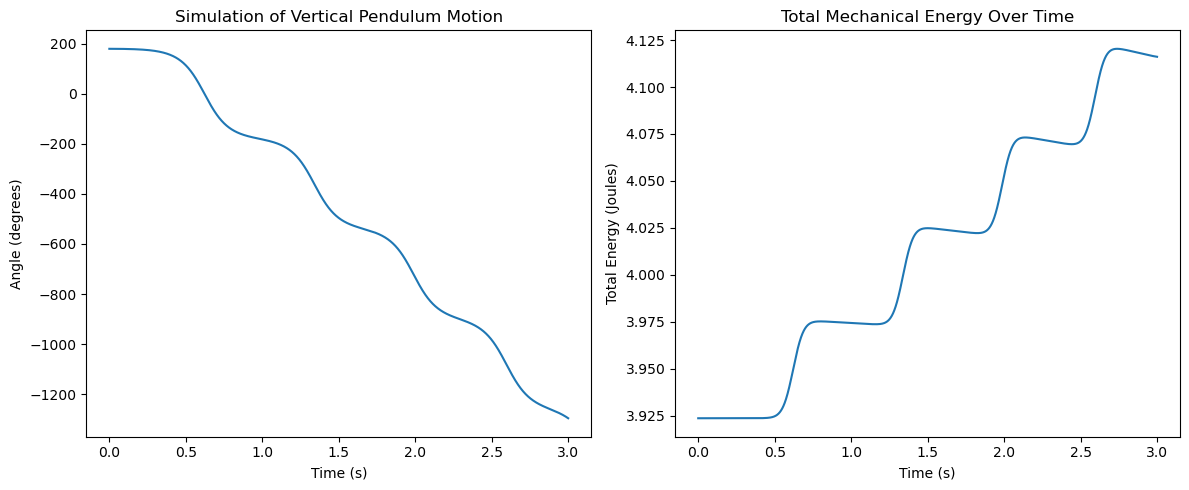

In [35]:
# Import necessary libraries
from math import sin, pi, cos
from numpy import array, arange
import matplotlib.pyplot as plt

# Define constants
g = 9.81  # Gravitational acceleration in m/s^2
l = 0.1   # Length of pendulum in meters (10 cm)

# Simulation time parameters
t0 = 0.0  # Start time
t1 = 3.0  # End time
N = 3000  # Number of time steps
h = (t1 - t0) / N  # Time step size

# Initial conditions
theta0 = 179.0 * (pi / 180)  # Initial angle in radians (converted from degrees)
omega0 = 0.0 * (pi / 180)    # Initial angular velocity in radians/s (converted from degrees/s)

# Initialize state vector
r = array([theta0, omega0], float)  # State vector [theta, omega]

# Prepare arrays for storing time and state values
tpoints = arange(t0, t1, h)  # Array of time points
thetapoints = []             # Array to store angle values
omegapoints = []             # Array to store angular velocity values
energy_points = []           # Array to store total mechanical energy
# Constants for energy calculation
m = 2.0  # Assuming a mass of 1 kg for simplicity

# Euler's Method to solve ODE and calculate energy
for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])

    # Calculate angular acceleration
    fomega = -(g / l) * sin(r[0])

    # Update state vector using Euler's method
    r[0] += h * r[1]               # Update angle
    r[1] += h * fomega             # Update angular velocity

    # Calculate and store total energy
    K = 0.5 * m * l**2 * r[1]**2            # Kinetic energy
    U = m * g * l * (1 - cos(r[0]))         # Potential energy
    total_energy = K + U
    energy_points.append(total_energy)

# Convert angle values from radians to degrees for plotting
thdpoints = [180 / pi * x for x in thetapoints]

# Plotting the angle over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tpoints, thdpoints)
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Simulation of Vertical Pendulum Motion")

# Plotting the energy over time
plt.subplot(1, 2, 2)
plt.plot(tpoints, energy_points)
plt.xlabel("Time (s)")
plt.ylabel("Total Energy (Joules)")
plt.title("Total Mechanical Energy Over Time")

plt.tight_layout()
plt.show()


## Question 14: Unit 21

Given a time series, how would you smooth it with a 5 pixel width filter?

### Answer
See code examples for unit 21.

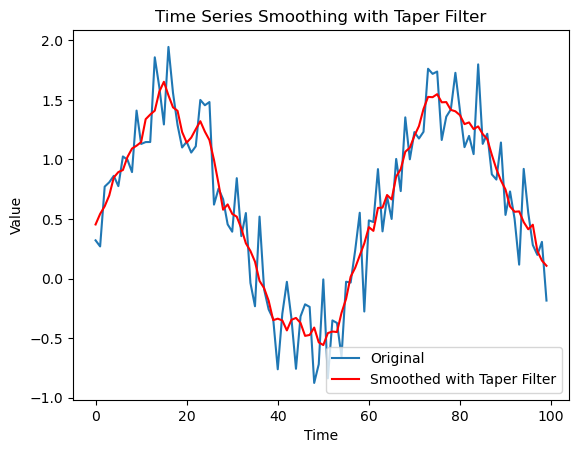

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def apply_taper_filter(data, window_size=5):
    # Initialize the smoothed series with zeros
    smoothed_data = np.zeros(len(data))

    # Half window size for indexing
    half_window = window_size // 2

    # Apply the taper filter
    for i in range(len(data)):
        # Determine the start and end indices of the window
        start_index = max(i - half_window, 0)
        end_index = min(i + half_window + 1, len(data))

        # Extract the window
        window_data = data[start_index:end_index]

        # Calculate the average
        smoothed_data[i] = np.mean(window_data)

    return smoothed_data

# Example: A noisy time series
#time_series = np.random.random(100) + np.sin(np.linspace(0, 10, 100))

# Apply the taper filter
smoothed_series = apply_taper_filter(time_series)

# Plotting
plt.plot(time_series, label='Original')
plt.plot(smoothed_series, label='Smoothed with Taper Filter', color='red')
plt.legend()
plt.title('Time Series Smoothing with Taper Filter')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


## Question 15: Unit 22
Given an image, how would you split small white `foreground' objects from a dark background?

### Answer
Use pixel histogram to determine threshold; then set values around median to zero to remove bakcground; set other values to 1 to identify obejct pixels.

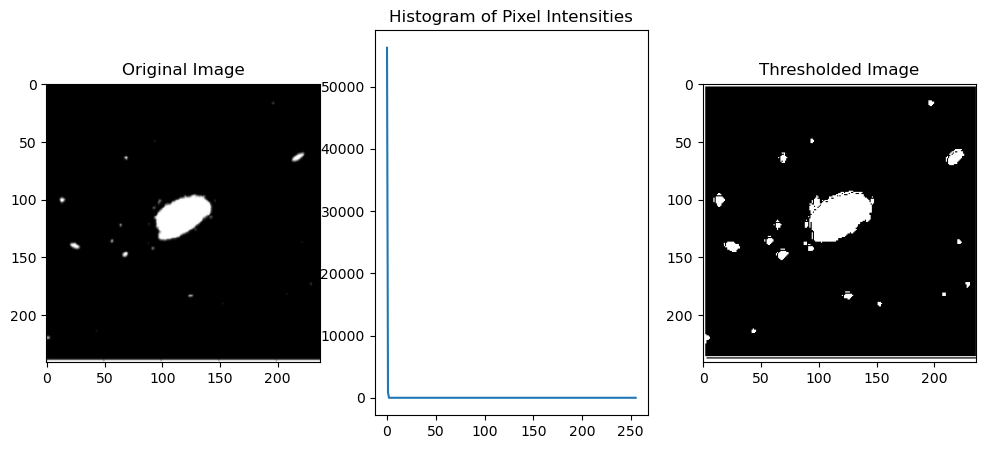

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image (assuming it's a grayscale image)

image = mpimg.imread("./test_image_2.png")
if image.ndim == 3:
    # Convert to grayscale if it's a color image
    image = np.mean(image, axis=2)

# Display the original image
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Histogram analysis to determine the threshold
hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
plt.subplot(1, 3, 2)
plt.plot(hist)
plt.title('Histogram of Pixel Intensities')

# Determine threshold (this may need adjustment based on the histogram)
threshold = np.median(image)  # Using median as a threshold

# Apply thresholding
binary_image = np.where(image > threshold, 1, 0)

# Display the thresholded image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.show()


## Question 16

Suppose we integrate the functions $f(x) = x^2 + 1$ or $g(x) =  x^3 -2x^2 +1$ with 100 samples on the interval [0,10].

If you do this using the trapezoid rule and Simpson's method, what do you expect the errors to be?


### Answer

Trapezoid rule has order $h^2$ errors; Simpson's rule has order $h^4$ errors; thus Simpson's rule should get both integrals right to within the roundoff error. A more detailed calculation is provided below:

For Question 16, let's refine the answer by considering the error expectations for the trapezoid rule and Simpson's method when integrating the functions $f(x) = x^2 + 1$ and $g(x) = x^3 - 2x^2 + 1$ over the interval [0,10] with 100 samples.


#### Trapezoid Rule:
The error in the trapezoid rule is proportional to the square of the step size ($h^2$). The step size $h$ is the width of each trapezoid, given by the range of integration divided by the number of samples. For 100 samples over [0,10], $h = \frac{10-0}{100} = 0.1$.

The error for the trapezoid rule can be estimated as:
$$ E_{\text{trapezoid}} = -\frac{(b-a)h^2}{12}f''(\xi) $$
where $\xi$ is some point in the interval [a, b].

For $f(x) = x^2 + 1$, $f''(x) = 2$, constant across [0,10]. Therefore, the error will be relatively small and easily calculable. However, for $g(x) = x^3 - 2x^2 + 1$, $g''(x) = 6x - 4$, which varies across the interval, making the error larger and dependent on the specific values of $x$.

#### Simpson's Rule:
Simpson's rule is a more accurate numerical integration technique that fits parabolas to the function being integrated. Its error is proportional to the fourth power of the step size ($h^4$). For a fine enough division (like 100 samples in our case), the error becomes very small.

The error for Simpson's rule can be estimated as:
$$ E_{\text{Simpson}} = -\frac{(b-a)h^4}{180}f^{(4)}(\xi) $$
where $f^{(4)}(\xi)$ is the fourth derivative of the function at some point in the interval [a, b].

For $f(x) = x^2 + 1$, the fourth derivative is zero, implying that Simpson's rule will give an exact result. Similarly, for $g(x) = x^3 - 2x^2 + 1$, the fourth derivative is also zero, and Simpson's rule should yield an exact result.


##  Question 17

Suppose you want to break image with most pixels having one of two values into two domains, and study the boundary between them. What sort of filter would you use? what would output look like?


### Answer

You would use an edge-detection filter, e.g. a 3x3 filter with a positive central value +1 and 8 values of -1/8 surrounding it.

The output would have an oscillation going negative - positive - negative every time you crossed a boundary, and be zero in constant regions.

### Python code

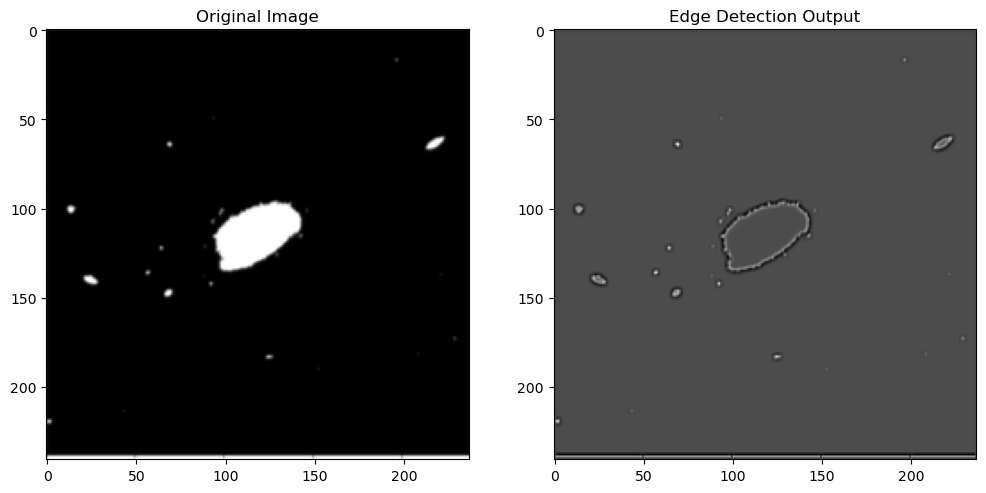

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the example image
image = mpimg.imread('./test_image.png')

# Convert the image to grayscale if it's a color image
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Define the edge-detection filter
filter = np.array([[ -1/8, -1/8, -1/8 ],
                   [ -1/8,    1, -1/8 ],
                   [ -1/8, -1/8, -1/8 ]])

# Initialize the output image
edge_detected = np.zeros_like(image)

# Apply the filter to each pixel manually
for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
        # Extracting the 3x3 neighborhood of the pixel
        neighborhood = image[i-1:i+2, j-1:j+2]
        
        # Applying the filter
        edge_detected[i, j] = np.sum(neighborhood * filter)

# Normalize the output for display
edge_detected = (edge_detected - np.min(edge_detected)) / (np.max(edge_detected) - np.min(edge_detected))

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edge_detected, cmap='gray')
plt.title('Edge Detection Output')
plt.show()


## Question 18

Given an array with positions $x(t)$, write code to get the velocities and accelerations $v(t), a(t)$;
comment on expected errors.



### Answer

We can use forward difference at each step: e.g. $v[i] = x[i+1] - x[i]$ and similarly for the acceleration from the velocity; errors will be linear in stepsize; a central difference method would do better.

### Example code

In [39]:
import numpy as np

def calculate_velocity_acceleration(x, dt):
    # Calculate velocities using forward difference
    v = np.diff(x) / dt

    # Calculate accelerations using forward difference on velocity
    # Note: We can also use np.diff twice on x, divided by dt**2
    a = np.diff(v) / dt

    # Adjust the length of v and a to match x's length (optional)
    v = np.append(v, np.nan)  # Assuming the last value is unknown
    a = np.append(a, [np.nan, np.nan])  # Last two values are unknown

    return v, a

# Example usage
dt = 1.0  # Time step, change as needed
x = np.array([0, 1, 4, 9, 16, 25])  # Example position data
v, a = calculate_velocity_acceleration(x, dt)

print("Velocities:", v)
print("Accelerations:", a)

Velocities: [ 1.  3.  5.  7.  9. nan]
Accelerations: [ 2.  2.  2.  2. nan nan]


In [44]:
v_array = np.zeros(len(x)-1)
a_array = np.zeros(len(x)-2) 

for i in range(len(x)-1):
    # Calculate velocities using forward difference
    v_array[i] = (x[i+1] - x[i]) / dt

for i in range(len(v_array)-1):
    # Calculate velocities using forward difference
    a_array[i] = (v_array[i+1] - v_array[i]) / dt
    
print(v_array)
print(a_array)

[1. 3. 5. 7. 9.]
[2. 2. 2. 2.]


In [47]:
v = (x[1:] - x[:-1]) / dt
print(v)
a = (v[1:] - v[:-1]) / dt
print(a)

[1. 3. 5. 7. 9.]
[2. 2. 2. 2.]


## Question 19

Given two arrays; what do you expect C = A*B to be in numpy?

How does this differ from matrix multiplication. Show (by hand) that the latter does not commute.


### Answer

Can try this out with 
$$A = \begin{bmatrix}0\ 5 \\ 1\ 7 \end{bmatrix}; B = \begin{bmatrix}2\ 1 \\ 1\ \ 4 \end{bmatrix}$$

In [51]:
import numpy as np
a = np.array([[0, 5],[1, 7]])
b = np.array([[2, 1],[1, 4]])
print("a*B=b: ", a*b)
print("ab or np.matmul(a,b): ", np.matmul(a,b))
print("ba or np.matmul(b,a): ", np.matmul(b,a))

a*B=b:  [[ 0  5]
 [ 1 28]]
ab or np.matmul(a,b):  [[ 5 20]
 [ 9 29]]
ba or np.matmul(b,a):  [[ 1 17]
 [ 4 33]]


## Question 20

Suppose in solving a set of linear equations, the leading coefficient in a line is zero; what should I do?


### Answer

pivot, swapping order of rows. For example:

$$ 5x_2 + 4x_3 = 1 $$
$$ x_1 + 7x_2 + 8x_3 = 0 $$
$$ 2x_1 + 3x_2 = 5 $$

The coefficient matrix:

$$A = \begin{bmatrix}\mathbf{0}\ 5 \ 4 \\ 1\ 7 \ 8 \\ 2 \ 3 \ 0\end{bmatrix} $$

Pivotting operation:

$$A = \begin{bmatrix}1 \ 7 \ 8 \\ \mathbf{0}\ 5 \ 4 \\ 2 \ 3 \ 0\end{bmatrix} $$